In [0]:
#!unzip air-pollution-in-seoul.zip

In [0]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('AirPollutionSeoul/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [0]:
# Retriving data for station code 101 for pm10
data_101=data[(data['Station code']==101) & (data['PM10']>0)]
print(len(data_101))
print(data_101.head(10))

25812
   Measurement date  Station code  ...  PM10  PM2.5
0  2017-01-01 00:00           101  ...  73.0   57.0
1  2017-01-01 01:00           101  ...  71.0   59.0
2  2017-01-01 02:00           101  ...  70.0   59.0
3  2017-01-01 03:00           101  ...  70.0   58.0
4  2017-01-01 04:00           101  ...  69.0   61.0
5  2017-01-01 05:00           101  ...  70.0   61.0
6  2017-01-01 06:00           101  ...  66.0   57.0
7  2017-01-01 07:00           101  ...  71.0   60.0
8  2017-01-01 08:00           101  ...  72.0   60.0
9  2017-01-01 09:00           101  ...  74.0   63.0

[10 rows x 11 columns]


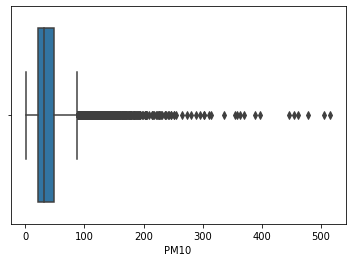

In [0]:
import seaborn as sns
sns.boxplot(data_101['PM10'])

25419


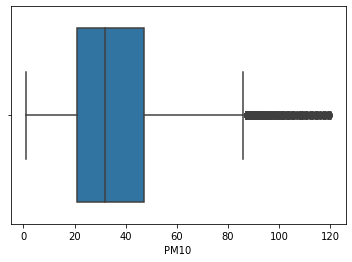

In [0]:
from scipy import stats
z = np.abs(stats.zscore(data_101['PM10']))
threshold = 3
#print(len(np.where(z > 3)))
data_101_Rout = data_101[(z < 3)]
print(len(data_101_Rout))
sns.boxplot(data_101_Rout['PM10'])

In [0]:
df=data_101_Rout['PM10']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25419, 1)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[1.] [120.]
25419
0.0 1.0


In [0]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25414 [0.6050420168067226, 0.5882352941176471, 0.5798319327731093, 0.5798319327731093, 0.5714285714285714]


In [0]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25414, 5)


,x1,x2,x3,x4,y
0,0.605042,0.588235,0.579832,0.579832,0.571429
1,0.588235,0.579832,0.579832,0.571429,0.579832
2,0.579832,0.579832,0.571429,0.579832,0.546218
3,0.579832,0.571429,0.579832,0.546218,0.588235
4,0.571429,0.579832,0.546218,0.588235,0.596639
5,0.579832,0.546218,0.588235,0.596639,0.613445
6,0.546218,0.588235,0.596639,0.613445,0.630252
7,0.588235,0.596639,0.613445,0.630252,0.689076
8,0.596639,0.613445,0.630252,0.689076,0.773109
9,0.613445,0.630252,0.689076,0.773109,0.781513


In [0]:
print(matrix[:,4])

[[0.57142857]
 [0.57983193]
 [0.54621849]
 ...
 [0.21848739]
 [0.18487395]
 [0.15966387]]


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8387, 1) [[0.08454375]
 [0.12363637]
 [0.32743283]
 [0.04783964]
 [0.52531731]]


In [0]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.9138693477907466
[0.01212442]
[[ 0.04826128 -0.00751034 -0.09785974  1.01641249]]


In [0]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0029734782260380085
absolute mean error :  0.03274105832994358
0.9052010480664819


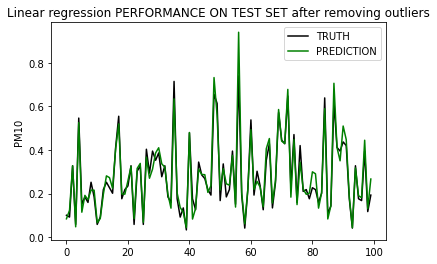

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('PM10')
plt.legend()
plt.show()

(25812, 1)
[1.] [516.]
25812
0.0 0.9999999999999999
25807 [0.13980582524271842, 0.13592233009708737, 0.13398058252427184, 0.13398058252427184, 0.1320388349514563]
(8517, 1) [[0.04092151]
 [0.02620815]
 [0.12984165]
 [0.02954135]
 [0.03921735]]
mean squared eror :  0.0008825112446148838
absolute mean error :  0.010432572398771886
0.6934771991008813


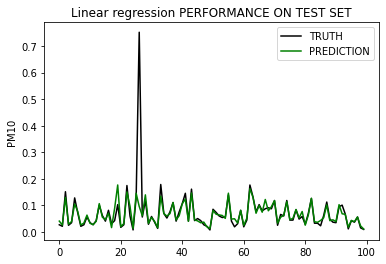

In [0]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_101['PM10']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [0]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0008824735568276516
absolute mean error :  0.010433989474255894
0.6934902892072936


In [0]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=15, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0007904573782400007
absolute mean error :  0.009646843187952456
0.7254502862734258


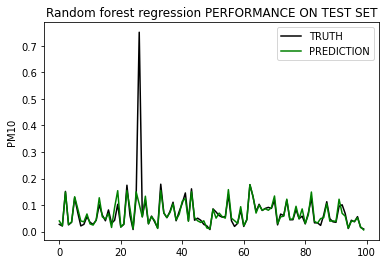

truth :  [[0.02718447]
 [0.02135922]
 [0.15145631]
 [0.02524272]
 [0.03495146]
 [0.12815534]
 [0.07184466]
 [0.02135922]
 [0.02718447]
 [0.05631068]]
prediction :  [0.04010543 0.02125319 0.14898337 0.02713712 0.03606217 0.13134604
 0.08651318 0.04001425 0.03681503 0.06637888]


In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('PM10')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [0]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0008780151211511025
0.010643718810028662
0.6950388385312185


In [0]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.001059613387545623
absolute mean error :  0.009223418004800475
0.631964277619574


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


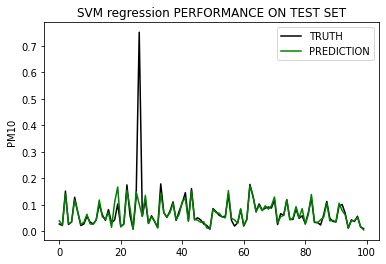

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [0]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17290/17290 [==============================] - 2s 139us/step - loss: 0.0010 - accuracy: 4.0486e-04
Epoch 2/100
17290/17290 [==============================] - 2s 133us/step - loss: 6.1656e-04 - accuracy: 4.0486e-04
Epoch 3/100
17290/17290 [==============================] - 2s 140us/step - loss: 6.0113e-04 - accuracy: 4.0486e-04
Epoch 4/100
17290/17290 [==============================] - 2s 140us/step - loss: 5.9339e-04 - accuracy: 4.0486e-04
Epoch 5/100
17290/17290 [==============================] - 2s 143us/step - loss: 5.8406e-04 - accuracy: 4.0486e-04
Epoch 6/100
17290/17290 [==============================] - 2s 140us/step - loss: 5.8477e-04 - accuracy: 4.0486e-04
Epoch 7/100
17290/17290 [==============================] - 2s 139us/step - loss: 5.6957e-04 - accuracy: 4.0486e-04
Epoch 8/100
17290/17290 [==============================] - 2s 132us/step - loss: 5.7571e-04 - accuracy: 4.0486e-04
Epoch 9/100
17290/17290 [==============================] - 2s 131us/step - loss: 5.6

dict_keys(['loss', 'accuracy'])


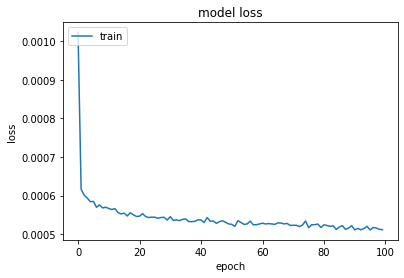

mean squared error :  0.0006566245832469967
mean absolute error :  0.009223418004800475
0.631964277619574


In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


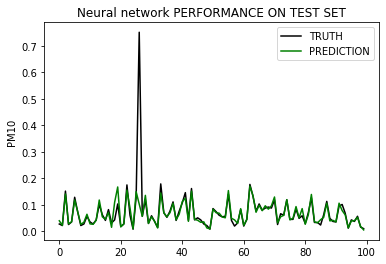

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [0]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.00970874 0.00776699 0.00776699 0.01165049]
 [0.14563107 0.13980583 0.12038835 0.12038835]
 [0.10679612 0.11067961 0.11456311 0.11456311]
 ...
 [0.06601942 0.06601942 0.58640777 0.09902913]
 [0.07184466 0.08932039 0.09708738 0.07572816]
 [0.03300971 0.03300971 0.04660194 0.02912621]]
(17290, 4)
(17290, 4, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17290/17290 [==============================] - 30s 2ms/step - loss: 0.0013
Epoch 2/100
17290/17290 [==============================] - 29s 2ms/step - loss: 9.4723e-04
Epoch 3/100
17290/17290 [==============================] - 29s 2ms/step - loss: 7.2550e-04
Epoch 4/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.7786e-04
Epoch 5/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.5426e-04
Epoch 6/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.5026e-04
Epoch 7/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.1310e-04
Epoch 8/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.1982e-04
Epoch 9/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.1500e-04
Epoch 10/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.0647e-04
Epoch 11/100
17290/17290 [==============================] - 29s 2ms/step - loss: 6.1639e-04
E

dict_keys(['loss'])


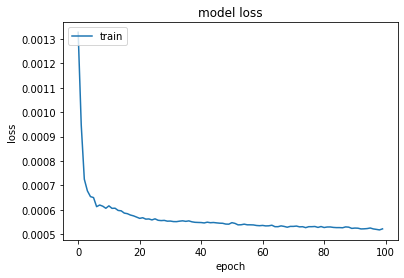

mean square error : 0.0006305104656698903
mean absolute error :  0.008708725093951047
0.7810046782829594


In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

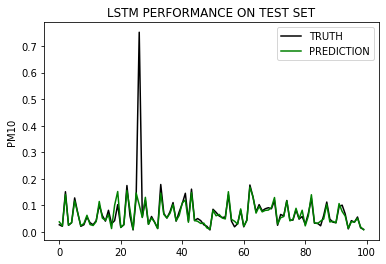

In [0]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [0]:
joblib.dump(regressor,'lstm_regressor.pkl')
from google.colab import files
files.download('lstm_regressor.pkl')